## Question 4

In [1]:
import numpy as np
import pandas as pd
train=pd.read_csv('../data/train_elections.csv',index_col=0)
test=pd.read_csv('../data/test_elections.csv',index_col=0)
features=train.columns[:-2]
target="trumpWinner"

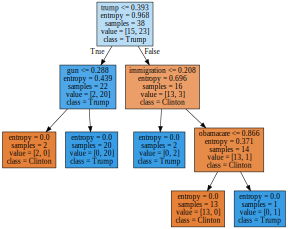

In [4]:
# Part (a):

import graphviz
import pydotplus
from sklearn.tree import export_graphviz as export
from sklearn.tree import DecisionTreeClassifier as DTC

def visualize(skl_tree):
    dot_format=export(skl_tree,class_names=["Clinton","Trump"],filled=True,feature_names=features)
    pydot_graph=pydotplus.graph_from_dot_data(dot_format)
    pydot_graph.set_size('"4,4!"')
    display(graphviz.Source(pydot_graph.to_string()))

'''Fit a decision tree on your train data and visualize it'''

# TO DO

# Solution:
model=DTC(criterion='entropy',min_samples_split=5)
model.fit(train.loc[:,features],train.loc[:,target])
visualize(model)

In [5]:
'''
Recreate this tree using if-else statements by completing the below function.
 - argument: a Pandas DataFrame corresponding to a single test state;
 - return: a boolean prediction for the target variable;
'''

def tree_alias(inp):
    # TO DO
    return None

# Solution:

def tree_alias(inp):
    if inp.loc["trump"]<=74.5:
        if inp.loc["gun"]<=63:
            return False
        else:
            return True
    else:
        if inp.loc["immigration"]<=43:
            return True
        else:
            if inp.loc["obamacare"]<=91:
                return False
            else:
                return True

In [6]:
# Check your results (run this cell):
ifelse_preds=[tree_alias(test.loc[state]) for state in test.index]
sklearn_preds=model.predict(test.loc[:,features])
results=[[int(ie),int(sk),int(not ie^sk)] for ie,sk in zip(ifelse_preds,sklearn_preds)]
results_df=pd.DataFrame(results,columns=['tree alias','tree sklearn','match?'],index=test.index)
display(results_df.T)

,CA,DE,ID,IN,MI,MS,NV,NY,PA,RI,TN,UT,VT
tree alias,0,0,1,1,0,1,0,0,0,0,1,1,1
tree sklearn,0,0,1,1,0,1,0,0,0,0,1,1,1
match?,1,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
'''
Fetch predictions from the fitted model (or use your 'tree_alias function')
and compare them to ground truth on the test set. In particular, create a Pandas
DataFrame named 'results_df' as above but with 'predicted', 'truth', 'correct?'
as rows and test states as columns. How many are classified correctly?
'''

# TO DO

# Solution:
predictions=[tree_alias(test.loc[state]) for state in test.index]
results=[[int(p),int(t),int(not p^t)] for p,t in zip(predictions,test.loc[:,target])]
results_df=pd.DataFrame(results,columns=['predicted','truth','correct?'],index=test.index)
display(results_df.T)

,CA,DE,ID,IN,MI,MS,NV,NY,PA,RI,TN,UT,VT
predicted,0,0,1,1,0,1,0,0,0,0,1,1,1
truth,0,0,1,1,1,1,0,0,1,0,1,1,0
correct?,1,1,1,1,0,1,1,1,0,1,1,1,0


In [13]:
# Part (b):

import math
def extended_log(arg):
    return 0 if not arg else math.log(arg)
def entropy(p):
    return -sum([p_i*extended_log(p_i) for p_i in p])

'''
Complete the class 'decision stump' that has attributes/methods:
- attribute 'self.split_feature': the name of the optimal splitting feature;
- attribute 'self.split_value': value at which self.split_feature should be split on;
- method 'fit(self,X,y)': decides on the above two attributes based on given Pandas
DataFrames X and y holding features and targets for all training examples, respectively.
Returns the list [self.split_feature,self.split_value] after fitting.
- method 'predict(self,X)': returns a list of predictions given a Pandas DataFrame X
holding features of some number of test examples. 
'''

class decision_stump():
    def __init__(self):
        self.split_feature=None
        self.split_value=None
    def fit(self,X,y):
        # TO DO
        return None
    def predict(self,X):
        # TO DO
        return None
        
# Solution:

class decision_stump():
    def __init__(self):
        self.split_feature=None
        self.split_value=None
        self.left_node_label=None
    def fit(self,X,Y):
        entropies=[]
        for i,feature in enumerate(X.columns):
            ordered_values=sorted(X.loc[:,feature])
            splits=[(ov_1+ov_2)/2 for ov_1,ov_2 in zip(ordered_values[1:],ordered_values[:-1])]
            f_entropies=[]
            for j,split in enumerate(splits):
                left_true,left_total=0,0
                right_true,right_total=0,0
                for val,y in zip(X.loc[:,feature],Y):
                    if val<=split:
                        left_true+=int(y)
                        left_total+=1
                    else:
                        right_true+=int(y)
                        right_total+=1
                w_left_entropy=left_total*entropy([0,0] if not left_total else [left_true/left_total,1-left_true/left_total])
                w_right_entropy=right_total*entropy([0,0] if not right_total else [right_true/right_total,1-right_true/right_total])
                f_entropies.append([w_left_entropy+w_right_entropy,split,left_true>0.5*left_total])
            entropies.append([min(f_entropies)[0],min(f_entropies)[1],min(f_entropies)[2],feature])
        self.split_value=min(entropies)[1]
        self.split_feature=min(entropies)[-1]
        self.left_node_label=min(entropies)[2]
        return self.split_feature,self.split_value
    def predict(self,X):
        predictions=[]
        for instance in X.loc[:,self.split_feature]:
            if instance<=self.split_value:
                predictions.append(self.left_node_label)
            else:
                predictions.append(not self.left_node_label)
        return predictions

my decision stump splits on "trump" at 74.0


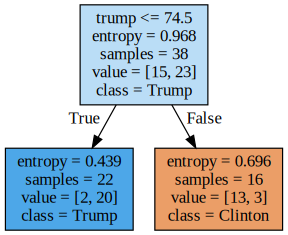

In [14]:
'''
Compare your implementation to one from sklearn; in particular, fit a sklearn's
decision stump on the same training data, visualize the resulting tree and compare
to your model in terms of the splitting feature and the splitting value. Comment
on your findings.
'''

# TO DO

# Solution:
dstump=decision_stump()
split_feature_value=dstump.fit(train.loc[:,features],train.loc[:,target])
print('my decision stump splits on "{}" at {}'.format(split_feature_value[0],split_feature_value[1]))
sklearn_model=DTC(criterion='entropy',max_depth=1)
sklearn_model.fit(train.loc[:,features],train.loc[:,target])
visualize(sklearn_model)

In [15]:
'''
Create another table like 'results_df' for the test set with the following rows:
(a) truth, (b) decision tree correct?, (c) decision stump correct? Does your decision
stump perform worse than the tree you fitted before? Are mistakes the same or not?
Comment on advantages and disadvatages of a decision stump compared to a decision tree.
'''

# TO DO

# Solution:
predictions_stump=dstump.predict(test.loc[:,features])
predictions_tree=model.predict(test.loc[:,features])
results=[[int(t),int(not p_t^t),int(not p_s^t)] for p_s,p_t,t in zip(predictions_stump,predictions_tree,test.loc[:,target])]
results_df=pd.DataFrame(results,columns=['truth','decision tree correct?','decision stump correct?'],index=test.index)
display(results_df.T)

,CA,DE,ID,IN,MI,MS,NV,NY,PA,RI,TN,UT,VT
truth,0,0,1,1,1,1,0,0,1,0,1,1,0
decision tree correct?,1,1,1,1,0,1,1,1,0,1,1,1,0
decision stump correct?,0,0,1,1,0,1,1,1,0,1,1,1,1


In [438]:
# Part (c):
from sklearn.ensemble import RandomForestClassifier as RFC
'''
Fit a random forest of 200 sklearn's decision stumps. Use entropy as splitting
criterion, bootstrap sampling of the training data and consider a random subset
of only 5 features for each split (effectively, for each tree). 
'''

# TO DO

# Solution:
model_2=RFC(n_estimators=200,criterion='entropy',bootstrap=True,max_features=5,max_depth=1)
model_2.fit(train.loc[:,features],train.loc[:,target])

RandomForestClassifier(criterion='entropy', max_depth=1, max_features=5,
                       n_estimators=200)

In [439]:
'''
Add the 'random forest correct?' row to the table we created in the previous part
How does it perform compared to the decision stump? Compared to the decision tree?
'''

# TO DO

# Solution:
results_df=results_df.T
random_forest_correct=[int(not r^t) for r,t in zip(model_2.predict(test.loc[:,features]),test.loc[:,target])]
results_df=results_df.append(pd.Series(random_forest_correct,name='random forest correct?',index=test.index))
display(results_df)

,CA,DE,ID,IN,MI,MS,NV,NY,PA,RI,TN,UT,VT
truth,0,0,1,1,1,1,0,0,1,0,1,1,0
decision tree correct?,1,1,1,1,0,1,1,1,0,1,1,1,1
decision stump correct?,0,0,1,1,0,1,1,1,0,1,1,1,1
random forest correct?,0,0,1,1,1,1,0,1,0,1,1,1,1
